# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding wheather a person is eligible for *Loan* or not (*Capstone project*)

## Getting Started

In this project, I have used some supervised algorithms to accurately predict wheather a particular person is eligible for loan or not using the dataset I have. I will then choose the best algorithm from preliminary results and further optimize this algorithm to best model the data. Here my goal is to implementation or construct a model that accurately predicts whether an individual is eligible for loan or not.  Understanding the details of an individual like gender ,martial status, education etc can help us to better understand finantial status of a person.

I took this dataset from the [UCI Machine Learning Repository](https://www.kaggle.com/ninzaami/loan-predication). The datset was donated by Amit Parjapat, after being released under CC0: Public Domain. The data we investigate here consists of small changes to the original dataset, such as removing the `'Loan_ID'` feature and records with missing or Null entries.

## Exploring the Data
By runnning the code cell below it will load all the necessary Python libraries and load the Csv data to a variable called data. Note that the last column from this dataset, `'Loan_Status'`, will be the target label (whether a person is eligible for loan ('Y') or not ('N') ). All other columns are features about each individual in the dataset.

In [16]:
#importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline




In [17]:
# Load the loan_prediction dataset into a varible named 'data' and display the data
data = pd.read_csv('loan_prediction.csv')
data.head()

Loan_ID Gender Married  Dependents     Education Self_Employed  \
0  LP001002   Male      No           0      Graduate            No   
1  LP001003   Male     Yes           1      Graduate            No   
2  LP001005   Male     Yes           0      Graduate           Yes   
3  LP001006   Male     Yes           0  Not Graduate            No   
4  LP001008   Male      No           0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [18]:
# Remove 'Loan_ID' as it is not useful to our problem and also 'Loan_Status' is dropped ,as it is the thing we are predicting.
features = data.drop(['Loan_ID','Loan_Status'],axis=1)
#put the 'Loan_Status' on result variable
result = data['Loan_Status']
#display first few lines to confirm the change
features.head()


Gender Married  Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No           0      Graduate            No             5849   
1   Male     Yes           1      Graduate            No             4583   
2   Male     Yes           0      Graduate           Yes             3000   
3   Male     Yes           0  Not Graduate            No             2583   
4   Male      No           0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area  
0         Urban  
1         Rural  
2         Urban  
3         Urban  
4         Urban

** Featureset Exploration **

* **Gender**: Female,Male. 
* **Married**: Yes, No. 
* **Dependents**: 0,1,2,3(more than 3). 
* **Education**: Graduate , Not Graduate. 
* **Self-Employed**: Yes,No.
* **ApplicantIncome**: Continuous.
* **CoapplicantIncome**: Continuous.
* **LoanAmount**: Continuous. 
* **Loan_Amount_Term**: Continuous. 
* **Credit_History**: 1, 0. 
* **Property_Area**: Rural,Urban,Semiurban. 
* **Loan_Status**: Y(Yes), N(No). 


----
## Preparing the Data
Before we use the data as input for our machine learning algorithms(models), it has to be cleaned, formatted, and restructured — this process is known as **preprocessing**. In our dataset we have some null (NaN) values are there which are called missing values. So I will clean them in later steps. And, there are some qualities about certain features that must be adjusted. This preprocessing can help us to get the better outcome and predictive power of nearly all learning algorithms.

- By running the cell below I can know how many missing values there in our data for each feature.

In [19]:
features.isnull().sum()

Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

# Preprocessing:
- Here we can see that there are total of 13 values missing in Gender feature , 3 in Married feature , 32 in Self_Employed, 22 in LoanAmount, 14 in Loan_Amount_Term , 50 in Credit_History.
- So we have to preprocess this data to go further. So I used a techinque, This technique will replace the missing values from 'LoanAmount' , 'Loan_Amount_Term','Dependents' with their respective feature's mean values, and remaining with 0. In gender 0 means 'Female' , in Self_Employed it means 'Not_Employed' etc.


- By running the below cell the above technique will be applied.

In [20]:
features['LoanAmount'] = features['LoanAmount'].fillna(int(features['LoanAmount'].mean()))
features['Loan_Amount_Term'] = features['Loan_Amount_Term'].fillna(int(features['Loan_Amount_Term'].mean()))
features['Dependents'] = features['Dependents'].fillna(int(features['Dependents'].mean()))

features['Credit_History'] = features['Credit_History'].fillna(0)
features['Self_Employed'] = features['Self_Employed'].fillna(0)
features['Married'] = features['Married'].fillna(0)
features['Gender'] = features['Gender'].fillna(0)


# Result:
- Here we can see the result from the above cell . i.e the sum of no of NaN values in each feature is 0 . which means the NaN (missing values) has been replaced with values.

- By running the below cell we can clearly see the result.

In [21]:
features.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [22]:
features.head()

Gender Married  Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No           0      Graduate            No             5849   
1   Male     Yes           1      Graduate            No             4583   
2   Male     Yes           0      Graduate           Yes             3000   
3   Male     Yes           0  Not Graduate            No             2583   
4   Male      No           0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       146.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area  
0         Urban  
1         Rural  
2         Urban  
3         Urban  
4         Urban

### Preprocessing continue:
- The above cell tells us that the NaN(missing values) are not any more.
- Now I want to change the values like Gender ('Male','Female) , married('Yes','No') ,Education ('Graduate','Not Graduate) ,Self_Employed ('Yes','No') , Property_Area ('Urban','Rural','Semiurban') to 1 , 0 .Which will help us further while training our algorithm (model) as the model can only trained on 'numerical values' not on 'strings'.


- By running the cell below we can replace our values with 1 and 0.

In [23]:
features['Gender'] = features['Gender'].replace('Male',1)
features['Gender'] = features['Gender'].replace('Female',0)

features['Married'] = features['Married'].replace('Yes',1)
features['Married'] = features['Married'].replace('No',0)

features['Education'] = features['Education'].replace('Graduate',1)
features['Education'] = features['Education'].replace('Not Graduate',0)

features['Self_Employed'] = features['Self_Employed'].replace('Yes',1)
features['Self_Employed'] = features['Self_Employed'].replace('No',0)

features['Property_Area'] = features['Property_Area'].replace('Urban',1)
features['Property_Area'] = features['Property_Area'].replace('Rural',2)
features['Property_Area'] = features['Property_Area'].replace('Semiurban',3)

In [24]:
features.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          1              0             5849   
1       1        1           1          1              0             4583   
2       1        1           0          1              1             3000   
3       1        1           0          0              0             2583   
4       1        0           0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0       146.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area  
0              1  
1              2  
2              1  
3              1  
4              1

- Same process as above also applied to the result data which we have to predict ('Y','N' to 1 , 0).

- By running the cells above and below we can see clearly how our data changed.

In [25]:
result = result.replace('Y',1)
result = result.replace('N',0)
result.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

###  Supervised Learning Models
**The following are some of the supervised learning models that we are chosen:**
- Logistic Regression
- Decision Trees
- Gradient Boosting
- AdaBoost



- I want to test our present data with the above Supervised models as these are very well in classification tasks.
- So in order to do that ,I have to import them initially .
- I have imported them and made names to them as 'clf1', 'clf2', 'clf3', 'clf4' respectively.
- Now I want to split my present data and predict from the models . And see how well my models are performing.
- From these four models I want to select the top 2 for further process and optimization . 


# Some postives and negatives of our selected models:
### Logistic Regression:
- Logistic regression has low variance . it works well with diagonal (feature) decision boundaries . if the decision boundary is linear, then logistic regression will work well.
- The main disadvantage is high bias and it may not work well on non-linear cases.
  
  
### Decision Tree Classifier:
- The main strength of this model is it Can easily handle qualitative (categorical) features . It works well with decision boundaries parellel to the feature axis .
- The main disadvantage of this model is it will some times prone to overfitting and will perform badly if it is overfitting (means if height of tree is very high) .


### Gradient Boosting:
- Gradient boosting is a machine learning technique mainly for regression and classification problems.It is one of the most powerful learning ideas introduced in the last twenty years.Gradient boosting can be used in the field of learning to rank.
- Gradient Boosting algorithm takes training time longer in come cases.


### AdaBoost  classifier:
- AdaBoost is a powerful classification algorithm, that has practical success with applications in a wide variety of fields, such as biology, computer vision, and speech processing.
- AdaBoost can be sensitive to noisy data and outliers.

In [26]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression()

from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(random_state=0)

from sklearn.ensemble import GradientBoostingClassifier
clf3 = GradientBoostingClassifier()

from sklearn.ensemble import AdaBoostClassifier
clf4 = AdaBoostClassifier()



# IMPORTING LIBRARIES FOR THE PERFORMANCE METRIC
from sklearn.metrics import accuracy_score,fbeta_score

# Normalization of data:
- Actually it is good practice to perform some type of scaling on numerical features. Applying a scaling to our data does'nt change the shape of each feature's distribution (such as *'AplicationIncome'* or *'LoanAmount'* etc); however, normalization ensures that each feature in our data is treated equally when applying supervised learners. Note that once scaling is applied to our data, observing the data in its raw form will no longer have the same original meaning.

- Let us Normalize the features in our data, I want to apply this process to 'Dependents','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Property_Area', as the values are continuous and random.


- Run the code cell below to perform Normalization, and see the results.

In [27]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() 
numerical = ['Dependents','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Property_Area']

features_log_minmax_transform = pd.DataFrame(data = features)
features_log_minmax_transform[numerical] = scaler.fit_transform(features[numerical])

# Shows an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0    0.000000          1              0         0.070489   
1       1        1    0.333333          1              0         0.054830   
2       1        1    0.000000          1              1         0.035250   
3       1        1    0.000000          0              0         0.030093   
4       1        0    0.000000          1              0         0.072356   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0           0.000000    0.198263           0.74359             1.0   
1           0.036192    0.172214           0.74359             1.0   
2           0.000000    0.082489           0.74359             1.0   
3           0.056592    0.160637           0.74359             1.0   
4           0.000000    0.191027           0.74359             1.0   

   Property_Area  
0            0.0  
1            0.5  
2            0.0  
3            0.0  
4            0.0

## EXPLORATORY VISUALIZATION
- ** In this part of the project I will visualize the mutual correlation between the input features in the data set to prerogatively understand the striking patterns exhibited by the features** 

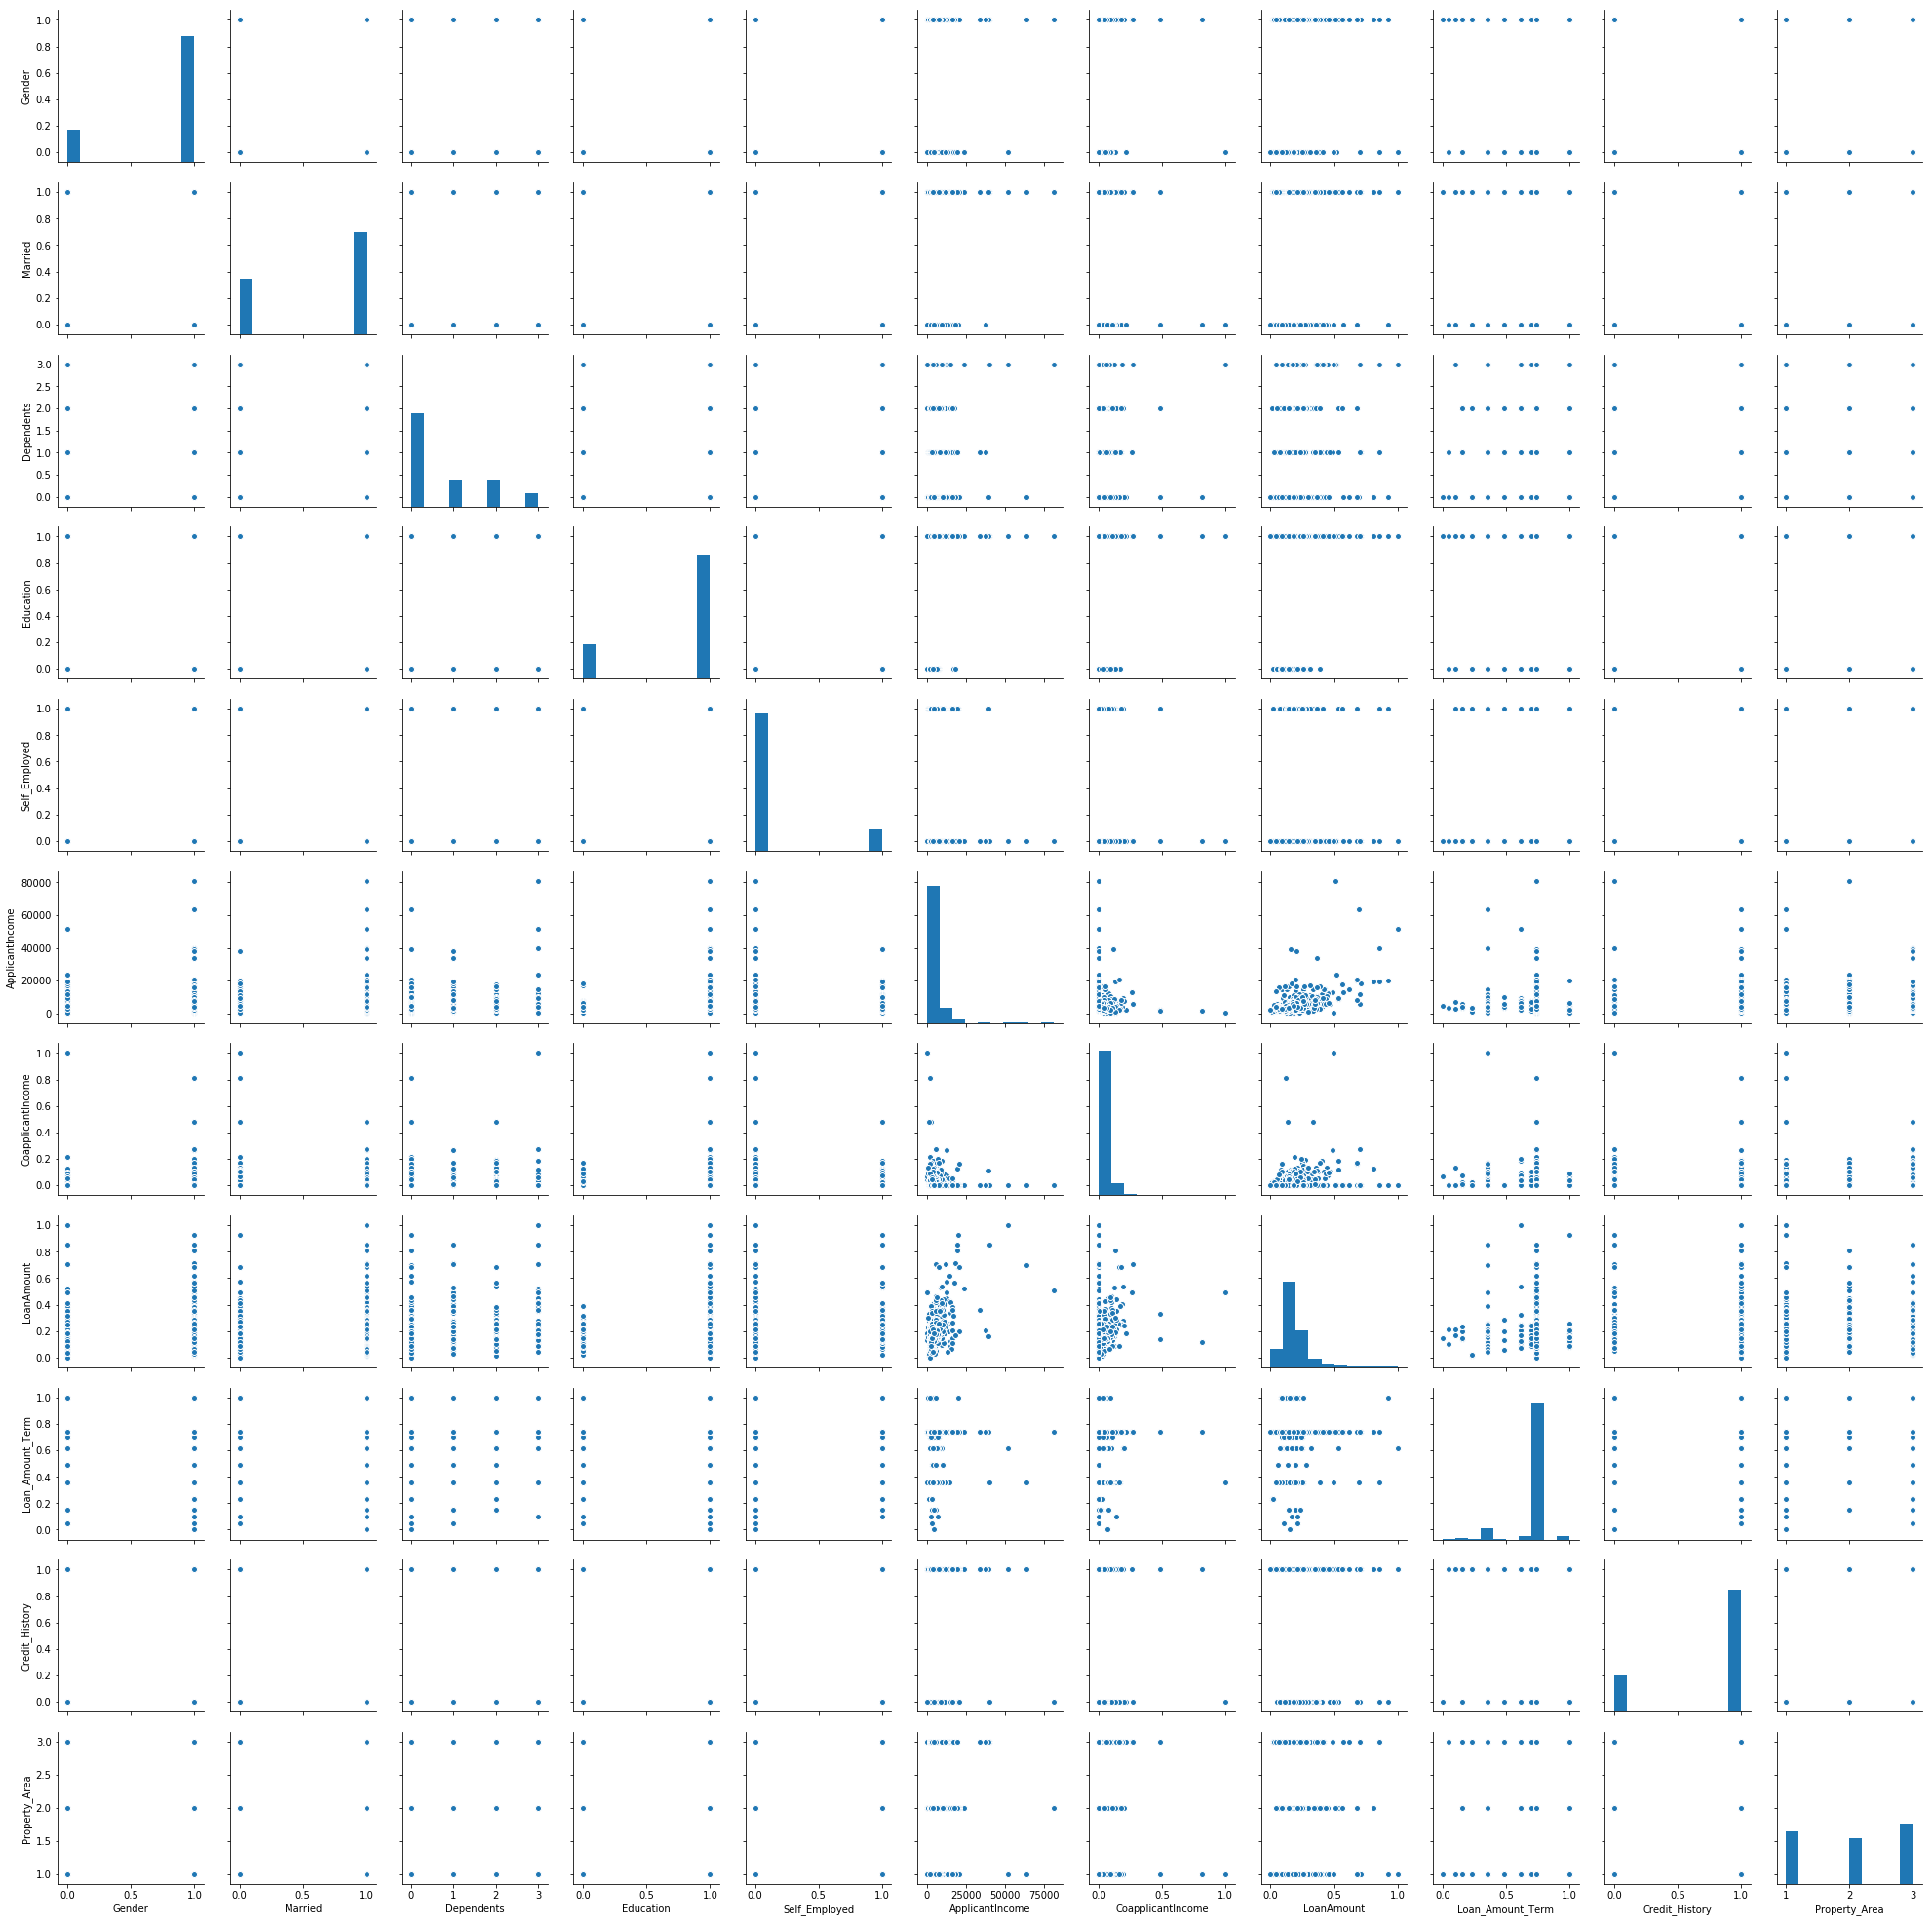

In [28]:
sns.pairplot(features)

- From the above plots we can see some corelation between the feature pairs
- Some of the pairs are (ApplicantIncome , LoanAmount) ,(CoapplicantIncome, LoanAmount) .
- These two pairs mainly showing us Corelation.

# After Normalization of data:
### Shuffle and Split Data
-Now all _categorical variables_ have been converted into numerical features,and all numerical features have been normalized. we will now split the data (both features and their results) into training and test sets. 80% of the data will be used for training and 20% for testing.

-Run the code cell below to perform this split.

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_log_minmax_transform, 
                                                    result, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 491 samples.
Testing set has 123 samples.


## BENCHMARK MODEL

### Logistic Regression:

In [31]:
clf1.fit(X_train , y_train)
pred = clf1.predict(X_test)
print 'The logistic Regression has an accuracy score of :', accuracy_score(pred,y_test)*100
print 'The logistic Regression has an fbeta score of :', fbeta_score(pred,y_test,beta=0.5)*100

The logistic Regression has an accuracy score of : 78.86178861788618
The logistic Regression has an fbeta score of : 88.42794759825328


## INITIAL MODEL EVALUATION

### Decesion Tree Classifier:

In [32]:
clf2.fit(X_train , y_train)
pred = clf2.predict(X_test)
print 'The Decision Tree Classifier has an accuracy score of :', accuracy_score(pred,y_test)*100
print 'The Decision Tree Classifier has an fbeta score of :', fbeta_score(pred,y_test,beta=0.5)*100

The Decision Tree Classifier has an accuracy score of : 71.54471544715447
The Decision Tree Classifier has an fbeta score of : 79.41834451901566


### Gradient Boosting Classifier:

In [33]:
clf3.fit(X_train , y_train)
pred = clf3.predict(X_test)
print 'The Gradient Boosting Classifier has an accuracy score of :', accuracy_score(pred,y_test)*100
print 'The Gradient Boosting Classifier has an fbeta score of :', fbeta_score(pred,y_test,beta=0.5)*100

The Gradient Boosting Classifier has an accuracy score of : 76.42276422764228
The Gradient Boosting Classifier has an fbeta score of : 87.14596949891067


### AdaBoost Classifier:

In [34]:
clf4.fit(X_train , y_train)
pred = clf4.predict(X_test)
print 'The AdaBoost Classifier has an accuracy score of :', accuracy_score(pred,y_test)*100
print 'The AdaBoost Classifier has an fbeta score of :', fbeta_score(pred,y_test,beta=0.5)*100

The AdaBoost Classifier has an accuracy score of : 78.86178861788618
The AdaBoost Classifier has an fbeta score of : 87.71929824561404


# Selecting a final model :
- From the above results we can clearly say that the benchmark model **LogisticRegressionClassifier** and the **AdaBoostClassifier** are given us best accuracy results, But coming to F-score LogisticRegressionClassifier shows a win among two, Now I want to optimize adaboost using GridSearchCV, if its F-score is more than Logistic Regression then I will take AdaBoost otherwise I'll go with LogisticRegression as my final model


### Upcoming steps:
- I want to use **GridSearchCV** on AdaBoost to further optimize my model to give better results.
- I want to tune parameters for this model, After that I want to make GridSearch object with this model.
- After that I will fit the splitted data to the object (X_train,y_train) to train my gridsearch object.
- Finally I want to calculate the **F-Score** which is a best metric for our object, and based on the F-Score we can known wheather it is better than our Benchmark model or not
- After we have done all these metrics , If we got our F-Score > F-score of logistic regression model then I'll take Adaboost as my final model otherwise I'll go with Logistic Regression.

In [35]:
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV

#Initialising the classifier
clf = AdaBoostClassifier(random_state=0)
parameters =  {"n_estimators": [1, 2]}
 
# we are creating fbeta_score scoring object using make_scorer() with beta value = 0.5.
scorer = make_scorer(fbeta_score, beta=0.5)

# Performing grid search on the our classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf,parameters)

#Fitting grid search object to the training data and finding the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)

# Getting the estimator
best_clf = grid_fit.best_estimator_

# Making predictions using the unoptimized and model
best_predictions = best_clf.predict(X_test)

# Final Scores
print("\nFinal Optimized Model scores:\n")
print("Accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))


Final Optimized Model scores:

Accuracy score on the testing data: 0.7886
F-score on the testing data: 0.8402


- If we see the results from above process the F-Score of AdaBoost is reduced from 87.7192  to 84.02 which is showing us it's not going to beat our Benchmark model **Logistic Regeession Classifier**. So I want to take Logistic Regression as my final model. 

# Final Results:
- Finally for our optimized model we have **Accuracy Score** of **78.86%** and mainly **F-Score** of **88.42%** which are actually a pretty good results for any model.


- **Here we are assuming mainly F-score because ,** let us know more about F-Score.

- **Precision** is a value which tells us that what proportion of predictions are classified as correct which are actually correct . In other words it can be represented as 
    [True Positives/(True Positives + False Positives)]
    
- **Recall** tells us what proportion of our predictions that actually correct were classified by us correctly predicted In other words it can be represented as 
    [True Positives/(True Positives + False Negatives)].
    
- **F-score:**	For classification problems if distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 were not, Here accuracy by itself is not a very good metric. We could classify 90 messages as not spam (including the 2 messages that were spam but we classified them as not spam, hence they would be false negatives for this classification) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases,the precision and recall helps us. These two will combine to get the F1 score, which is weighted average(harmonic mean) of precision and recall scores. This score can range form 0 to 1 , with 1 being the best.


- So finally we get F-score as 0.8842 which is a good metric to describe about our model.

### Let us Predict with our data
Let us consider me as an Insurance agent and I have some 3 clients data ,Now I want to predict whether these 3 people are eligible or not using our final model. 

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Gender | F | M | M |
| Married | Y | Y | N |
|Dependents | 3 | 2 | 1 |
| Education| Graduated | NotGraduated | Graduated |
| Self_Employed| Yes  | No | Yes |
| Applicant_Income | 6000 | 9000 | 3000 |
|Coapplicant_Income | 0 | 100 | 10 |
| LoanAmount| 158 | 141 | 349 |
| Loan_Amount_Term| 120 | 360 | 180 |
|Credit_History | 1 | 0 | 1 |
| Property_Area| R | U | U |

* Now we can Know our predictions about our clients.
- From the above results and features of the clients I'm predicting 3rd person is eligible for Loan , and first 2 persons not eligible for loan.(Remember these are just random samples by us)
- our predictions are client 1: No , client 2: No , client 3: Yes .Let us see how our algorithm predicts.

In [36]:
#First we have to apply Normalization to our data
# This data is about 'Dependents' , 'Applicant_Income', 'Coapplicant_Income', 'LoanAmount', 'Loan_Amount_Term', 'Property-Area'
# which we have to normalize
print scaler.fit_transform([[3,600,0,158,120,1],[2,9000,100,141,360,1],[1,3000,10,349,180,1]])

[[1.         0.         0.         0.08173077 0.         0.        ]
 [0.5        1.         1.         0.         1.         0.        ]
 [0.         0.28571429 0.1        1.         0.25       0.        ]]


In [37]:
client_data = [[0, 1, 1, 1, 0, 1, 1, 0, 0.8173077, 0, 0], # Client 1
               [1, 1, 0.5, 0, 0, 1,1, 0, 1, 0, 0], # Client 2
               [1, 0, 0, 1, 1, 0.28571429, 0.1, 1,0.25 ,1 ,0]]  # Client 3

# Show predictions
for i, price in enumerate(clf1.predict(client_data)):
    print("The Client {}'s eligibility: {}".format(i+1, price))
    
print "\n\nHere 1 means eligible and 0 means not eligible"

The Client 1's eligibility: 0
The Client 2's eligibility: 0
The Client 3's eligibility: 1


Here 1 means eligible and 0 means not eligible


- our predictions met here with the models predictions and also our model performs well on the unknown data.

# Conclusion:
- Therefore from the F-score and accuracy score of our model and also from the above results we can clearly say that **the model is performing best on our data and predicting very well**.